### This problem focuses on the collinearity problem.

(a) Perform the following commands in Python:
```
rng = np.random.default_rng (10)<>
x1 = rng.uniform (0, 1, size =100)
x2 = 0.5 * x1 + rng.normal(size =100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size =100)
```
(b)
The last line corresponds to creating a linear model in which y is
a function of x1 and x2. Write out the form of the linear model.
What are the regression coefficients?
What is the correlation between x1 and x2? Create a scatterplot
displaying the relationship between the variables.

(c) Using this data, fit a least squares regression to predict y using
x1 and x2. Describe the results obtained. What are β̂0 , β̂1 , and
β̂2 ? How do these relate to the true β0 , β1 , and β2 ? Can you
reject the null hypothesis H0 : β1 = 0? How about the null
hypothesis H0 : β2 = 0?

(d) Now fit a least squares regression to predict y using only x1.
Comment on your results. Can you reject the null hypothesis
H0 : β1 = 0?

(e) Now fit a least squares regression to predict y using only x2.
Comment on your results. Can you reject the null hypothesis
H0 : β1 = 0?

(f) Do the results obtained in (c)–(e) contradict each other? Explain
your answer.

(g) Suppose we obtain one additional observation, which was unfor-
tunately mismeasured. We use the function np.concatenate() to np.conca-
add this additional observation to each of x1, x2 and y.
tenate()
x1 = np.concatenate ([x1 , [0.1]])
x2 = np.concatenate ([x2 , [0.8]])
y = np.concatenate ([y, [6]])
Re-fit the linear models from (c) to (e) using this new data. What
effect does this new observation have on the each of the models?
In each model, is this observation an outlier? A high-leverage
point? Both? Explain your answers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The linear model is:

$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \varepsilon $ 

$ y = 2 + 2 x_1 + 0.3 x_2 + \varepsilon $

Correlation between x1 and x2: 0.772324497691354


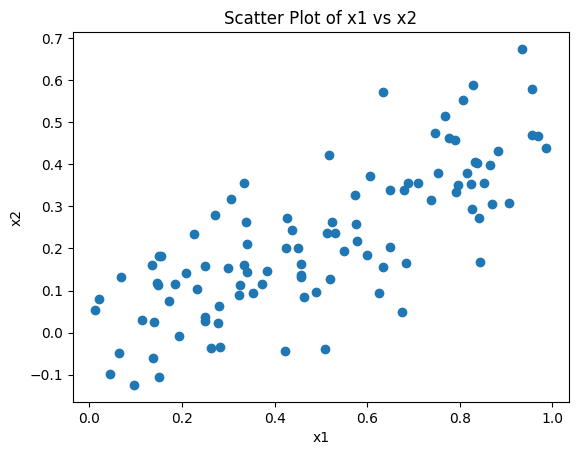

In [2]:
correlation = np.corrcoef(x1, x2)[0, 1]
print(f"Correlation between x1 and x2: {correlation}")
plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot of x1 vs x2')
plt.show()

In [3]:
# part c
X = sm.add_constant(np.column_stack((x1, x2)))
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           5.76e-08
Time:                        21:03:41   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.0

In [4]:
# PART D
X1 = sm.add_constant(x1)
model_x1 = sm.OLS(y, X1).fit()
print(model_x1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           1.37e-08
Time:                        21:03:41   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

In [5]:
X2 = sm.add_constant(x2)
model_x2 = sm.OLS(y, X2).fit()
print(model_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           7.43e-07
Time:                        21:03:41   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

In [ ]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])


In [7]:
print(y)

[4.35697711 3.67778851 3.48207881 2.36909332 1.41329539 4.20750629
 2.57167458 3.91937236 3.37262726 3.12696558 3.56116566 3.28659541
 2.99093735 3.17884697 3.29016738 3.23154962 2.02457872 3.86499698
 2.60842138 4.86156336 2.45220933 3.18771988 3.4247815  4.31264243
 4.04213658 2.74898481 2.97663313 3.60829046 3.33659211 2.39586587
 2.16177801 2.59150777 5.43193727 3.08958983 2.87226452 1.99681481
 0.12091645 3.644074   3.38606229 4.50012386 2.35809596 3.87742528
 2.80321893 0.68900189 3.32236151 2.25527731 3.64036741 1.04633436
 2.35023716 1.44445948 0.89747455 3.65158127 5.30946703 3.6709363
 4.26794145 5.06154084 3.42008377 3.11252106 1.23449794 3.22092493
 2.21268616 3.30792402 2.8090962  4.20233228 2.25403897 2.98808164
 3.38177348 3.50598973 2.97210161 3.98904757 1.64301736 2.29445824
 1.94060257 2.69267502 3.04120359 4.51221993 2.0686078  2.95405771
 1.76561729 1.17036527 1.69488554 1.06797893 3.48885221 1.3047942
 2.82725422 2.94154934 3.86393421 2.39835694 0.71371864 1.679152

In [8]:
# Re-fit the models with the new data
X = sm.add_constant(np.column_stack((x1, x2)))
model_new = sm.OLS(y, X).fit()
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           4.60e-08
Time:                        21:03:41   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0618      0.192     10.720      0.0

In [9]:
X1 = sm.add_constant(x1)
model_x1_new = sm.OLS(y, X1).fit()
print(model_x1_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           9.23e-07
Time:                        21:03:41   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0739      0.201     10.310      0.0

In [10]:
X2 = sm.add_constant(x2)
model_x2_new = sm.OLS(y, X2).fit()
print(model_x2_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           3.13e-08
Time:                        21:03:41   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2840      0.151     15.088      0.0